In [3]:
import numpy as np
from SequentialPOVMMeasurement import SequentialPOVMMeasurement, SequentialPOVMMeasurementCircuit
import qiskit
from qiskit import *
from utilities import simple_povm_xyz

This circuit measured x- when the results were 001 and x+ when results were 000



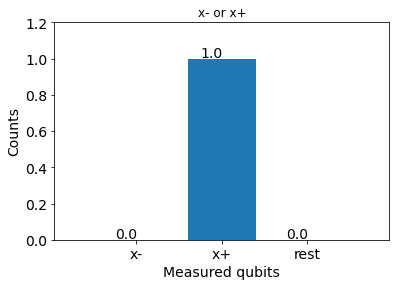

In [9]:

povm_basic = [
    np.array([[1/2, 1/2],
              [1/2, 1/2]]),
    np.array([[1/2, -1/2],
              [-1/2, 1/2]]),
    np.array([[1/2, 0+(-1j/2)],
              [0+(1j/2), 1/2]]),
    np.array([[1/2, 0+(1j/2)],
              [0+(-1j/2), 1/2]]),
    np.array([[1, 0],
              [0, 0]]),
    np.array([[0, 0],
              [0, 1]])
]

qasm = qiskit.Aer.get_backend("qasm_simulator")

effects = [0, 1, 2, 3]
n = len(effects)
povm_effects = [2 * povm_basic[j] / n for j in effects]

# Initialize the object using POVM effects and assign labels to them
seq = SequentialPOVMMeasurement(povm_effects, ["x+", "x-", "y+", "y-"])

# Prepare measured state
state = QuantumCircuit(1, 1)
state.h(0)

# Make list of SequentialPOVMMeasurementCircuit objects which will measure the effects using this partition
circuits = seq.make_circuits([["x+", "x-"], ["y+", "y-"]], state)
circuits_x = seq.make_circuits([["x-"], [["y+", "x+"], ["y-"]]], state)
circuit1 = circuits[0]

circuit1.q_circuit.draw("mpl")

print(f"This circuit measured {circuit1.one.label} when the results were {circuit1.one_result} and {circuit1.zero.label} when results were {circuit1.zero_result}\n")

job_0 = qiskit.execute(circuit1.q_circuit, qasm, shots=1000)
circuit1.plot_histogram(job_0.result().get_counts(), circuit1.one.label + ' or ' + circuit1.zero.label)




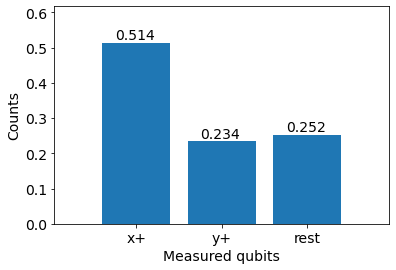

In [4]:
# different partitioning, measuring the second circuit i. e. x+ or y+
circuit1, circuit2 = seq.make_circuits([["x-", "y-"], ["x+", "y+"]], state)
job_0 = qiskit.execute(circuit2.q_circuit, qasm, shots=1000)
circuit2.plot_histogram(job_0.result().get_counts())

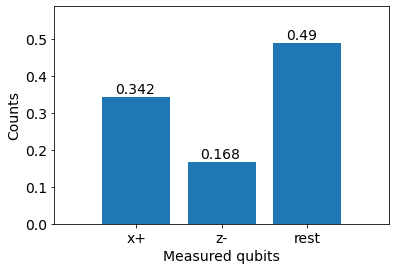

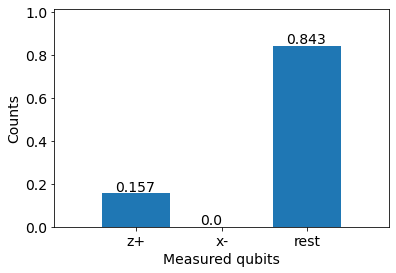

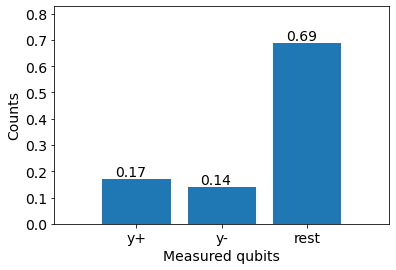

In [5]:
# measuring 6 effect POVM
effects = [0, 1, 2, 3, 4, 5]
n = len(effects)

povm_effects = [2 * povm_basic[j] / n for j in effects]

seq = SequentialPOVMMeasurement(povm_effects, ["x+", "x-", "y+", "y-", "z+", "z-"])
state = QuantumCircuit(1, 1)
state.h(0)

circuits = seq.make_circuits([["x+", "z-"], [["z+", "x-"], ["y+", "y-"]]], state)
job_0 = qiskit.execute(circuits[0].q_circuit, qasm, shots=1000)
circuits[0].plot_histogram(job_0.result().get_counts())

job_1 = qiskit.execute(circuits[1].q_circuit, qasm, shots=1000)
circuits[1].plot_histogram(job_1.result().get_counts())

job_2 = qiskit.execute(circuits[2].q_circuit, qasm, shots=1000)
circuits[2].plot_histogram(job_2.result().get_counts())

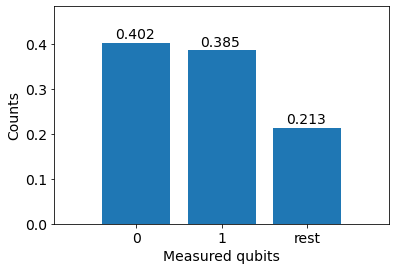

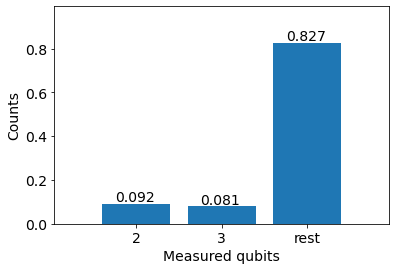

In [9]:
from utilities import povm_tetrahedron
seq = SequentialPOVMMeasurement(povm_tetrahedron)
state = QuantumCircuit(1, 1)
state.h(0)

circuits = seq.make_circuits([["0", "1"], ["2", "3"]], state)
job_0 = qiskit.execute(circuits[0].q_circuit, qasm, shots=1000)
circuits[0].plot_histogram(job_0.result().get_counts())

job_1 = qiskit.execute(circuits[1].q_circuit, qasm, shots=1000)
circuits[1].plot_histogram(job_1.result().get_counts())


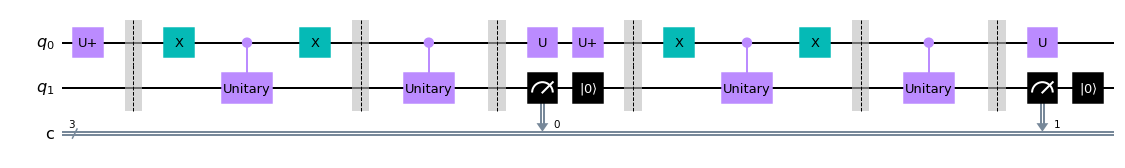

In [5]:
seq = SequentialPOVMMeasurement(simple_povm_xyz, ["x+", "x-", "y+", "y-", "z+", "z-"])
state = QuantumCircuit(1, 1)
circuit = seq.make_circuits([["z+", "z-"], [["y+", "y-"], ["x+", "x-"]]], state)
circuit[0].q_circuit.draw("mpl")